<a href="https://colab.research.google.com/github/erminro/DataMining/blob/main/Roman_Ermin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Charles John Huffam Dickens was an English writer and social critic. He created some of the world's best-known fictional characters and is regarded by many as the greatest novelist of the Victorian era.

# Problem Statement
This project aims to create an understanding of Charles Dickens' writing. We want to unveil his sentiments in the writings, his most important words and on what he centers the attention on in his novles.

In [ ]:
!pip install gutenbergpy tidytext
!pip install afinn
!pip install stop-words
!pip install -U gensim
!pip install pyLDAvis
!pip install wordcloud
!pip install textacy
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=ffd1e13077b420db17cfd3a480c6d8c5f7919b091cc59dfbf29489d26cc15431
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDA

# Dataset Description
The dataset is composed of 3 books written by Charles Dickens: Oliver Twist, A Tale Of Two Cities and Great Expectations. I created here all the dataframes used in the project including bigrams.                                   


In [ ]:


import pandas as pd
import gutenbergpy.textget
from tidytext import unnest_tokens
import nltk
nltk.download('punkt')
from nltk import *
from siuba import *

import pandas as pd
import gutenbergpy.textget
from tidytext import unnest_tokens
import nltk
nltk.download('punkt')
from nltk import *
from siuba import *
#Importing the books
raw_book = gutenbergpy.textget.get_text_by_id(46675)
oliver_twist_text = gutenbergpy.textget.strip_headers(raw_book).decode("utf-8")

raw_book = gutenbergpy.textget.get_text_by_id(98)
tale_two_cities_text = gutenbergpy.textget.strip_headers(raw_book).decode("utf-8")

raw_book = gutenbergpy.textget.get_text_by_id(1400)
great_expectations_text = gutenbergpy.textget.strip_headers(raw_book).decode("utf-8")
#Creating the dataframe for words
import re
oliver_twist_lines = oliver_twist_text.splitlines()
tale_two_cities_lines = tale_two_cities_text.splitlines()
great_expectations_lines = great_expectations_text.splitlines()

oliver_twist_df = pd.DataFrame({
    "content": oliver_twist_lines,
    "line": list(range(len(oliver_twist_lines)))
})

tale_two_cities_df = pd.DataFrame({
    "content": tale_two_cities_lines,
    "line": list(range(len(tale_two_cities_lines)))
})

great_expectations_df = pd.DataFrame({
    "content": great_expectations_lines,
    "line": list(range(len(great_expectations_lines)))
})

def line_is_chapter(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("^chapter [\\divxlc]*", row['content'], re.IGNORECASE):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

oliver_twist_df2 = oliver_twist_df.assign(book='Oliver Twist')
tale_two_cities_df2 = tale_two_cities_df.assign(book="A Tale of Two Cities")
great_expectations_df2 = great_expectations_df.assign(book='Great Expectations')

charles_dickens_list = [oliver_twist_df2, tale_two_cities_df2, great_expectations_df2]
charles_dickens_df = pd.concat(charles_dickens_list)
charles_dickens_df = (unnest_tokens(charles_dickens_df, "word", "content"))
charles_dickens_df.reset_index(drop=True, inplace=True)
charles_dickens_df
#Creating the dataframes for words based on chapters for each book individually
ss_df = oliver_twist_df.copy()
curr_chapter = 0
oliver_twist_df3 = oliver_twist_df.assign(chapter = line_is_chapter(ss_df))
oliver_twist_df3=(unnest_tokens(oliver_twist_df3, "word", "content"));

ss_df2 =great_expectations_df.copy()
curr_chapter = 0
great_expectations_df3 = great_expectations_df.assign(chapter = line_is_chapter(ss_df2))
great_expectations_df3=(unnest_tokens(great_expectations_df3, "word", "content"));
ss_df3 = tale_two_cities_df.copy()
curr_chapter = 0
tale_two_cities_df3 = tale_two_cities_df.assign(chapter = line_is_chapter(ss_df3))
tale_two_cities_df3=(unnest_tokens(tale_two_cities_df3, "word", "content"));
#Creating the bigrams dataframe
oliver_twist_bigrams_generator = ngrams(word_tokenize(oliver_twist_text.lower()), 2)
oliver_twist_bigrams = [ ' '.join(grams) for grams in oliver_twist_bigrams_generator]
oliver_twist_b = pd.DataFrame({
    "book": 'Oliver Twist',
    "bigrams": oliver_twist_bigrams,
})
tale_two_cities_bigrams_generator = ngrams(word_tokenize(tale_two_cities_text.lower()), 2)
tale_two_cities_bigrams = [ ' '.join(grams) for grams in tale_two_cities_bigrams_generator]
tale_two_cities_b = pd.DataFrame({
    "book": "A Tale of Two Cities",
    "bigrams": tale_two_cities_bigrams,
})

great_expectations_bigrams_generator = ngrams(word_tokenize(great_expectations_text.lower()), 2)
great_expectations_bigrams = [ ' '.join(grams) for grams in great_expectations_bigrams_generator]
great_expectations_b = pd.DataFrame({
    "book": 'Great Expectations',
    "bigrams": great_expectations_bigrams,
})
charles_dickens_books = [oliver_twist_b, tale_two_cities_b, great_expectations_b]
charles_dickens_books_df = pd.concat(charles_dickens_books)

charles_dickens_books_df[['word1', 'word2']] = charles_dickens_books_df['bigrams'].str.split(expand=True)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Clensing

Filtered the data for all dataframes using stop words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
remove_words = []
punctuation_signs = ['\'', "''", ';', '"', ',', '.', '!', '?', '/', '[', ']', '(', ')', '“', '”', '’', '‘', '``', "--",'*',':']
remove_words.extend(stopwords.words('english'))
remove_words.extend(punctuation_signs)
charles_dickens_df_all_words=charles_dickens_df.copy()
charles_dickens_df_all_words=charles_dickens_df_all_words.dropna()#Removed all NaN values
charles_dickens_df_all_words.reset_index(drop=True, inplace=True)#Resetting the index
charles_dickens_df=charles_dickens_df[~charles_dickens_df.word.isin(remove_words)]#Removed stop words from english and punctuation signs
charles_dickens_df=charles_dickens_df.dropna()#Removed all NaN values
charles_dickens_df.reset_index(drop=True, inplace=True)#Reset index
#For sentiment analysis clensing
#Removed stop words from english and punctuation signs for all 
oliver_twist_df3=oliver_twist_df3[~oliver_twist_df3.word.isin(remove_words)]
great_expectations_df3=great_expectations_df3[~great_expectations_df3.word.isin(remove_words)]
tale_two_cities_df3=tale_two_cities_df3[~tale_two_cities_df3.word.isin(remove_words)]
#Removed all NaN values for all 
tale_two_cities_df3=tale_two_cities_df3.dropna()
great_expectations_df3=great_expectations_df3.dropna()
oliver_twist_df3=oliver_twist_df3.dropna()
#Resetting the index for all 
oliver_twist_df3.reset_index(drop=True, inplace=True)
great_expectations_df3.reset_index(drop=True, inplace=True)
tale_two_cities_df3.reset_index(drop=True, inplace=True)
#For bigrams clensing
charles_dickens_books_df=charles_dickens_books_df[~charles_dickens_books_df.word1.isin(remove_words)]#Removed stop words from english and punctuation signs for word 1
charles_dickens_books_df=charles_dickens_books_df[~charles_dickens_books_df.word2.isin(remove_words)]#Removed stop words from english and punctuation signs for word 2
charles_dickens_books_df=charles_dickens_books_df.dropna()#Remove all NaN values
charles_dickens_books_df.reset_index(drop=True, inplace=True)#Reset index

#For the topic analysis clensing and lemmatization
def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word)  > 5]

        return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Analyzing word and document frequency
At first I analyzed the frequecy of words using wordcloud and then I wanted to see based on tf-idf score the top 20 words.

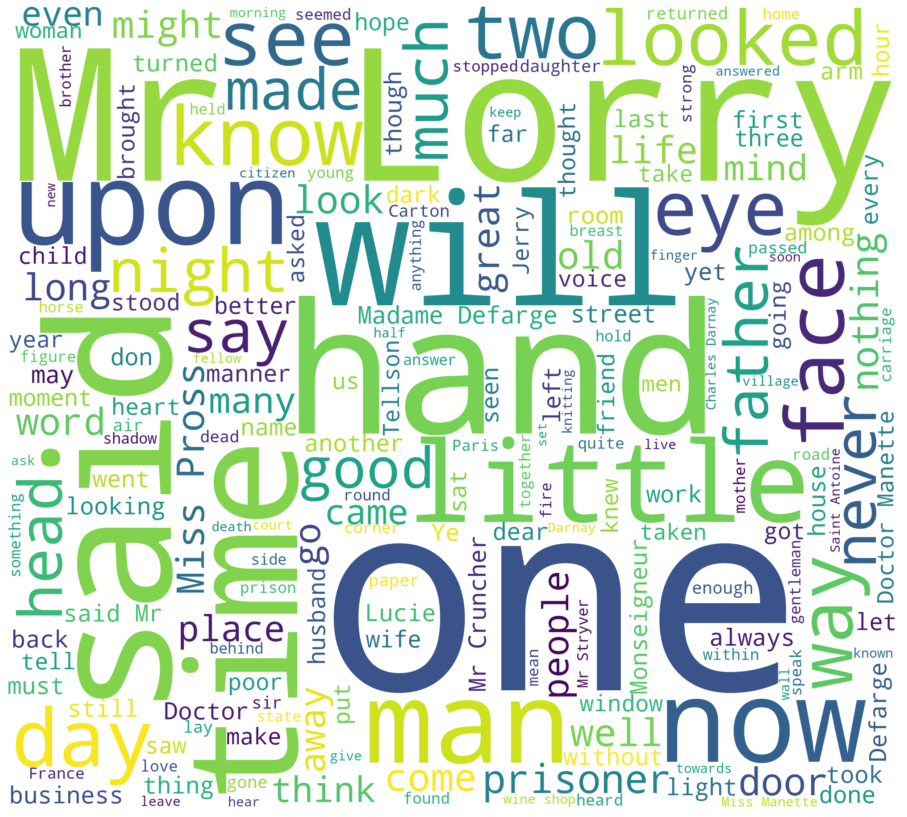

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
#Generate the wordcloud in order to see the most used words
wordcloud = WordCloud(background_color='white', width=2000, height=1800).generate(tale_two_cities_text)
#Polted the figure
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

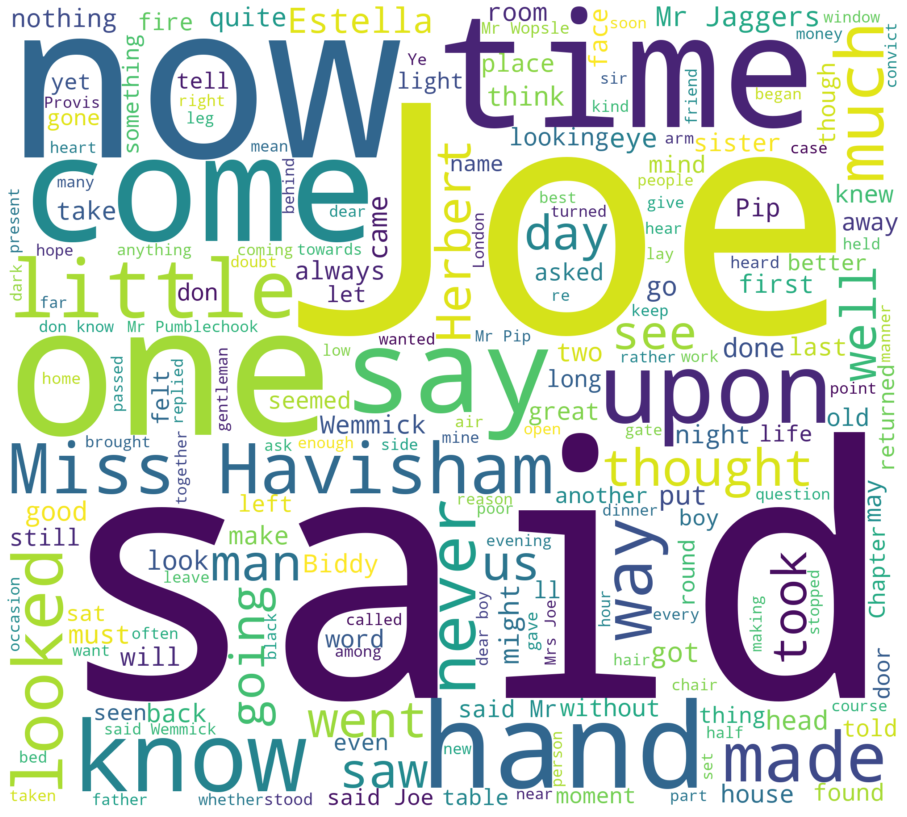

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
#Generate the wordcloud in order to see the most used words
wordcloud = WordCloud(background_color='white', width=2000, height=1800).generate(great_expectations_text)
#Polted the figure
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

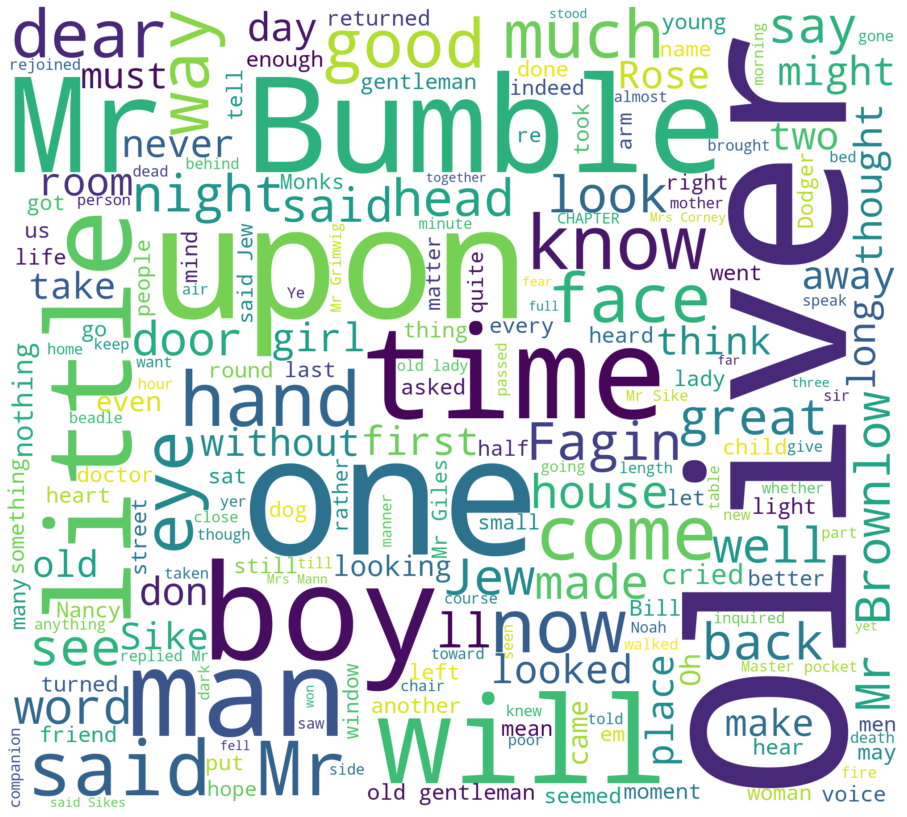

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
#Generate the wordcloud in order to see the most used words
wordcloud = WordCloud(background_color='white', width=2000, height=1800).generate(oliver_twist_text)
#Polted the figure
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from siuba import *
from tidytext import *
from siuba.dply.forcats import fct_reorder
from plotnine import *
#Create the tf-idf dataframe 
book_words = count(charles_dickens_df_all_words, _.book, _.word, sort=True)
book_tf_idf = bind_tf_idf(book_words, 'word', 'book', 'n')
#Arrange by book and tf-idf score
tf_idf_df = ungroup(group_by(arrange(book_tf_idf, -_.tf_idf), 'book').head(20))
ordered_tf_idf_df = arrange(tf_idf_df, _.book, -_.tf_idf)
ordered_tf_idf_df





,book,word,n,tf,idf,tf_idf
190,A Tale of Two Cities,lorry,366,0.002544,1.098612,0.002795
227,A Tale of Two Cities,defarge,300,0.002085,1.098612,0.002291
358,A Tale of Two Cities,madame,192,0.001335,1.098612,0.001466
420,A Tale of Two Cities,manette,162,0.001126,1.098612,0.001237
422,A Tale of Two Cities,pross,161,0.001119,1.098612,0.001230
443,A Tale of Two Cities,carton,155,0.001077,1.098612,0.001184
464,A Tale of Two Cities,darnay,146,0.001015,1.098612,0.001115
511,A Tale of Two Cities,lucie,129,0.000897,1.098612,0.000985
548,A Tale of Two Cities,cruncher,120,0.000834,1.098612,0.000916
568,A Tale of Two Cities,monsieur,117,0.000813,1.098612,0.000894


# Topic analysis
I wanted to split the books into topics and see the most relevant terms for each topic.

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
import gensim
import pyLDAvis.gensim_models
from gensim import corpora, models
from nltk.stem import WordNetLemmatizer
from stop_words import get_stop_words
stemmer = WordNetLemmatizer()
en_stop = set(nltk.corpus.stopwords.words('english'))
#Create book corpus
books_corpus = [oliver_twist_text, tale_two_cities_text, great_expectations_text]
processed_data = [];
#Get the tokens
for doc in books_corpus:
    tokens = preprocess_text(doc)
    processed_data.append(tokens)   
#Create gensim dictionary and corpus
gensim_dictionary = corpora.Dictionary(processed_data)
gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in processed_data]
#Create the lda model
lda_model = gensim.models.ldamodel.LdaModel(gensim_corpus, num_topics=3, id2word=gensim_dictionary, passes=50)
#Print the topics and the most importat 15 num-words
topics = lda_model.print_topics(num_words=15)
for topic in topics:
    print(topic, '\n')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


(0, '0.022*"oliver" + 0.011*"replied" + 0.010*"bumble" + 0.009*"gentleman" + 0.007*"little" + 0.004*"brownlow" + 0.004*"looked" + 0.004*"without" + 0.004*"thought" + 0.004*"looking" + 0.003*"friend" + 0.003*"street" + 0.003*"doctor" + 0.003*"another" + 0.003*"turned"') 

(1, '0.009*"defarge" + 0.008*"little" + 0.006*"doctor" + 0.006*"father" + 0.006*"looked" + 0.005*"madame" + 0.005*"prisoner" + 0.005*"manette" + 0.004*"carton" + 0.004*"nothing" + 0.004*"darnay" + 0.004*"street" + 0.004*"people" + 0.004*"another" + 0.004*"business"') 

(2, '0.009*"little" + 0.008*"looked" + 0.008*"havisham" + 0.008*"herbert" + 0.007*"wemmick" + 0.007*"thought" + 0.006*"estella" + 0.006*"jagger" + 0.005*"pocket" + 0.005*"looking" + 0.004*"nothing" + 0.004*"always" + 0.004*"sister" + 0.004*"another" + 0.004*"pumblechook"') 



In [ ]:
#See which book corresponds to which topic
print(lda_model[gensim_corpus[0]])
print(lda_model[gensim_corpus[1]])
print(lda_model[gensim_corpus[2]])

[(0, 0.99997854)]
[(1, 0.9999749)]
[(2, 0.9999792)]


In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
import gensim
import pyLDAvis.gensim_models
from gensim import corpora, models
from nltk.stem import WordNetLemmatizer
from stop_words import get_stop_words

#Create the visualization of the lda_model
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, gensim_corpus, gensim_dictionary, sort_topics=False)
pyLDAvis.display(lda_visualization)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# Relationship between words (N-grams)
In the first cell i wanted to see the most relevat 10 bigrams based on tf-idf score and in the second one I wanted to see in what context was the word little used since I observed that it is used a lot in each book.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


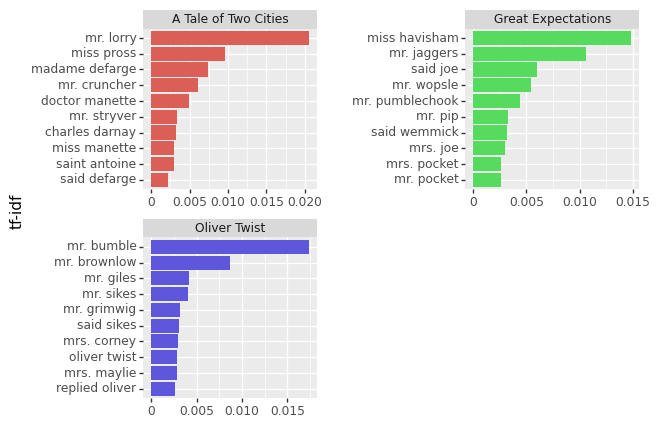

<ggplot: (8729868096645)>

In [ ]:
from nltk import *
from siuba import *
#Create the tf-idf form bigrams
booksc = count(charles_dickens_books_df, _.book, _.bigrams, _.word1, _.word2, sort=True)
books_tf_idf = bind_tf_idf(booksc, 'bigrams', 'book', 'n')
#Get the first 10 best classified by tf-idf bigrams for each book
graph_books = ungroup(group_by(arrange(books_tf_idf, -_.tf_idf), 'book').head(10))
#Arranged by book and tf-idf score
ordered_graph_books = arrange(graph_books, _.book, -_.tf_idf)
ordered_graph_books
#Plot the graph
ggplot(ordered_graph_books) + aes(x=fct_reorder(ordered_graph_books['bigrams'], x=ordered_graph_books['tf_idf']), y='tf_idf', fill='book') + coord_flip() + geom_col(show_legend = False) + facet_wrap('~book', ncol = 2, scales = "free") + labs(x = "tf-idf", y = None) + theme(subplots_adjust={'wspace': 1}) + theme(subplots_adjust={'wspace': 0.85, 'hspace': 0.3}) + scale_x_discrete()


In [ ]:
from siuba import *
#Filtered the bigrames in order to see in what contexts was little used (since it's an adjective I made the choice to put it as the first word)
aux_df=count(filter(charles_dickens_books_df, _.word1=='little'), _.book, _.word1, _.word2, sort=True)
aux_df.head(20)


,book,word1,word2,n
0,Great Expectations,little,britain,16
1,A Tale of Two Cities,little,lucie,12
2,Oliver Twist,little,oliver,11
3,Great Expectations,little,child,10
4,Oliver Twist,little,room,10
5,Great Expectations,little,room,7
6,Oliver Twist,little,time,7
7,Great Expectations,little,thing,6
8,Great Expectations,little,way,6
9,Great Expectations,little,girl,6


# Sentiment analysis for A Tale Of Two Cities
In the first cell we have a plot with the sentiment score by chapter and in the next cell I wanted to see which words influenced the most positive chapter and in the last cell which words influenced the most negative chapter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


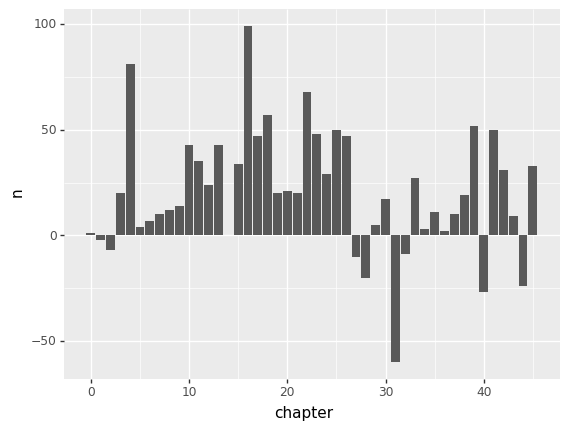

<ggplot: (8729873664041)>

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from siuba import *
sia = SentimentIntensityAnalyzer()
#Created a dataframe with nltk sentiments for the words
list_nltk_sentiments = ['positive' if sia.polarity_scores(word)['compound'] > 0 else 'negative' if sia.polarity_scores(word)['compound'] < 0 else 'neutral' for word in tale_two_cities_df3['word']]
tale_two_cities_df3 = tale_two_cities_df3.assign(nltk_sentiment = list_nltk_sentiments)
#Count the sentiments (negative, positive) based on chapter
test_df = count(filter(tale_two_cities_df3, _.nltk_sentiment != 'neutral'), 'chapter', 'nltk_sentiment')
# Multiply the count with -1 for the chapters that have negative parts
test_df.loc[test_df['nltk_sentiment'] == 'negative', 'n'] *= -1
# Sum by chapter of the positive and negative parts
test_df_sentiment = test_df.groupby(test_df.chapter).sum().reset_index()
#Plot
(ggplot(test_df_sentiment)         
 + aes(x='chapter', y='n')   
 + geom_bar(stat='identity') 
)



In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from siuba import *
#Count the wotrds based on word, chapter and sentiment
tale_two_cities_df4=count(filter(tale_two_cities_df3, _.nltk_sentiment != 'neutral'),'word', 'chapter', 'nltk_sentiment')
tale_two_cities_df4=tale_two_cities_df4[tale_two_cities_df4['chapter']==16]
#Multiply with -1 negative words
tale_two_cities_df4.loc[tale_two_cities_df4['nltk_sentiment'] == 'negative', 'n'] *= -1
#Sort by impact
tale_two_cities_df4=tale_two_cities_df4.sort_values(by=['n'], ascending=False)
tale_two_cities_df4.head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,word,chapter,nltk_sentiment,n
2744,hand,16,positive,13
3548,love,16,positive,12
6010,well,16,positive,9
937,confidence,16,positive,5
3574,loves,16,positive,5
1230,dear,16,positive,5
3446,like,16,positive,4
4361,promise,16,positive,4
3006,hope,16,positive,3
3237,interest,16,positive,3


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from siuba import *
#Count the wotrds based on word, chapter and sentiment
tale_two_cities_df4=count(filter(tale_two_cities_df3, _.nltk_sentiment != 'neutral'),'word', 'chapter', 'nltk_sentiment')
tale_two_cities_df4=tale_two_cities_df4[tale_two_cities_df4['chapter']==31]
#Multiply with -1 negative words
tale_two_cities_df4.loc[tale_two_cities_df4['nltk_sentiment'] == 'negative', 'n'] *= -1
#Sort by impact
tale_two_cities_df4=tale_two_cities_df4.sort_values(by=['n'])
tale_two_cities_df4.head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,word,chapter,nltk_sentiment,n
4297,prison,31,negative,-12
4318,prisoner,31,negative,-11
2438,ghost,31,negative,-8
391,bad,31,negative,-4
1283,death,31,negative,-4
5016,stopped,31,negative,-4
5188,struck,31,negative,-4
405,barrier,31,negative,-4
1212,dead,31,negative,-3
4333,prisoners,31,negative,-3


# Sentiment analysis for Great Expectations
In the first cell we have a plot with the sentiment score by chapter and in the next cell I wanted to see which words influenced the most positive chapter and in the last cell which words influenced the most negative chapter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


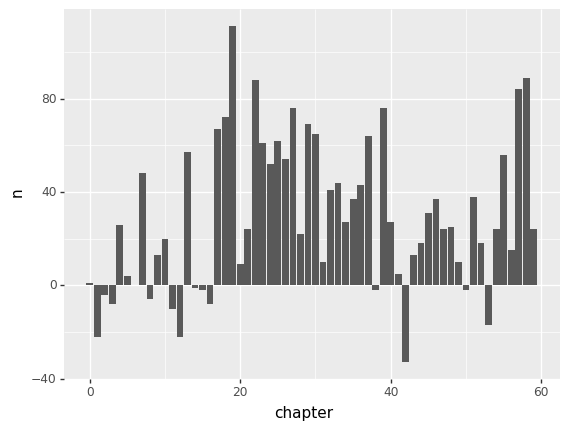

<ggplot: (8729867662233)>

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from siuba import *
sia = SentimentIntensityAnalyzer()
#Created a dataframe with nltk sentiments for the words
list_nltk_sentiments = ['positive' if sia.polarity_scores(word)['compound'] > 0 else 'negative' if sia.polarity_scores(word)['compound'] < 0 else 'neutral' for word in great_expectations_df3['word']]
great_expectations_df3 = great_expectations_df3.assign(nltk_sentiment = list_nltk_sentiments)
#Count the sentiments (negative, positive) based on chapter
test_df = count(filter(great_expectations_df3, _.nltk_sentiment != 'neutral'), 'chapter', 'nltk_sentiment')
# Multiply the count with -1 for the chapters that have negative parts
test_df.loc[test_df['nltk_sentiment'] == 'negative', 'n'] *= -1
# Sum by chapter of the positive and negative parts
test_df_sentiment = test_df.groupby(test_df.chapter).sum().reset_index()
#Plot
(ggplot(test_df_sentiment)        
 + aes(x='chapter', y='n')   
 + geom_bar(stat='identity') 
)




In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from siuba import *
#Count the wotrds based on word, chapter and sentiment
great_expectations_df4=count(filter(great_expectations_df3, _.nltk_sentiment != 'neutral'),'word', 'chapter', 'nltk_sentiment')
great_expectations_df4=great_expectations_df4[great_expectations_df4['chapter']==19]
#Multiply with -1 negative words
great_expectations_df4.loc[great_expectations_df4['nltk_sentiment'] == 'negative', 'n'] *= -1
#Sort by impact
great_expectations_df4=great_expectations_df4.sort_values(by=['n'], ascending=False)
great_expectations_df4.head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,word,chapter,nltk_sentiment,n
7393,well,19,positive,16
1552,dear,19,positive,13
2880,friend,19,positive,8
3421,hand,19,positive,7
3245,great,19,positive,6
566,best,19,positive,5
3107,good,19,positive,5
4875,number,19,positive,5
619,better,19,positive,5
7624,yes,19,positive,4


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from siuba import *
#Count the wotrds based on word, chapter and sentiment
great_expectations_df4=count(filter(great_expectations_df3, _.nltk_sentiment != 'neutral'),'word', 'chapter', 'nltk_sentiment')
great_expectations_df4=great_expectations_df4[great_expectations_df4['chapter']==42]
#Multiply with -1 negative words
great_expectations_df4.loc[great_expectations_df4['nltk_sentiment'] == 'negative', 'n'] *= -1
#Sort by impact
great_expectations_df4=great_expectations_df4.sort_values(by=['n'])
great_expectations_df4.head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,word,chapter,nltk_sentiment,n
7295,warn,42,negative,-14
2716,fire,42,negative,-4
4529,low,42,negative,-3
4587,mad,42,negative,-3
1534,dead,42,negative,-3
3784,horrors,42,negative,-3
5084,pity,42,negative,-3
1800,devil,42,negative,-3
451,awful,42,negative,-3
3532,hard,42,negative,-3


# Sentiment analysis for Oliver Twist
In the first cell we have a plot with the sentiment score by chapter and in the next cell I wanted to see which words influenced the most positive chapter and in the last cell which words influenced the most negative chapter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


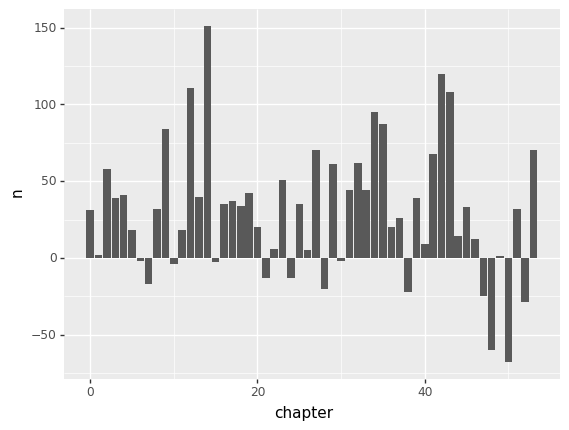

<ggplot: (8729873653197)>

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from siuba import *
sia = SentimentIntensityAnalyzer()
#Created a dataframe with nltk sentiments for the words
list_nltk_sentiments = ['positive' if sia.polarity_scores(word)['compound'] > 0 else 'negative' if sia.polarity_scores(word)['compound'] < 0 else 'neutral' for word in oliver_twist_df3['word']]
oliver_twist_df3 = oliver_twist_df3.assign(nltk_sentiment = list_nltk_sentiments)
#Count the sentiments (negative, positive) based on chapter
test_df = count(filter(oliver_twist_df3, _.nltk_sentiment != 'neutral'), 'chapter', 'nltk_sentiment')
# Multiply the count with -1 for the chapters that have negative parts
test_df.loc[test_df['nltk_sentiment'] == 'negative', 'n'] *= -1
# Sum by chapter of the positive and negative parts
test_df_sentiment = test_df.groupby(test_df.chapter).sum().reset_index()
#Plot
(ggplot(test_df_sentiment)        
 + aes(x='chapter', y='n')    
 + geom_bar(stat='identity') 
)




In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from siuba import *
#Count the words based on chapter and sentiment
oliver_twist_df4=count(filter(oliver_twist_df3, _.nltk_sentiment != 'neutral'),'word', 'chapter', 'nltk_sentiment')
oliver_twist_df4=oliver_twist_df4[oliver_twist_df4['chapter']==14]
#Multiply with -1 negative words
oliver_twist_df4.loc[oliver_twist_df4['nltk_sentiment'] == 'negative', 'n'] *= -1
#Sort by impact
oliver_twist_df4=oliver_twist_df4.sort_values(by=['n'], ascending=False)
oliver_twist_df4.head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,word,chapter,nltk_sentiment,n
3282,great,14,positive,12
7738,well,14,positive,12
2850,friend,14,positive,11
3153,good,14,positive,8
1518,dear,14,positive,7
4446,like,14,positive,6
3739,hope,14,positive,5
7956,yes,14,positive,4
3481,handsome,14,positive,4
6706,strongly,14,positive,4


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from siuba import *
#Count the wotds based on chapter and sentiment
oliver_twist_df4=count(filter(oliver_twist_df3, _.nltk_sentiment != 'neutral'),'word', 'chapter', 'nltk_sentiment')
oliver_twist_df4=oliver_twist_df4[oliver_twist_df4['chapter']==50]
#Multiply with -1 negative words
oliver_twist_df4.loc[oliver_twist_df4['nltk_sentiment'] == 'negative', 'n'] *= -1
#Sort by impact
oliver_twist_df4=oliver_twist_df4.sort_values(by=['n'])
oliver_twist_df4.head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,word,chapter,nltk_sentiment,n
1310,cried,50,negative,-9
4960,murderer,50,negative,-9
1377,cry,50,negative,-4
2160,drop,50,negative,-4
1319,cries,50,negative,-3
4679,lower,50,negative,-3
2301,empty,50,negative,-3
2513,falling,50,negative,-3
314,angry,50,negative,-3
1897,dirt,50,negative,-2


# Entity Recognition / PoS
Charles Dickens used real places in his books and I wanted to showcase that by using entity recongintion with 'FAC' for it to detect buildings,streets,etc..

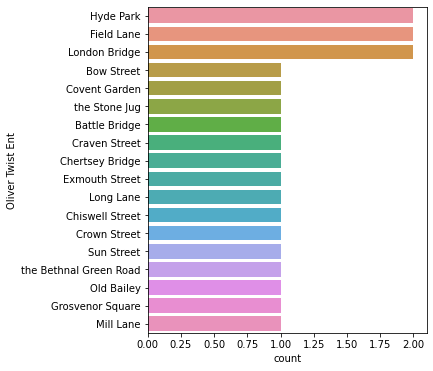

In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
nlp = spacy.load('en_core_web_lg')
#Load entities
doc1 = nlp(oliver_twist_text)
oliver_ent = []
#Get entities with lable "FAC"
for ent in doc1.ents:
    if ent.label_  in ["FAC"] :
        oliver_ent.append(ent.text.strip())
    df_ent = pd.DataFrame(oliver_ent, columns=["Oliver Twist Ent"])
#Plot
plt.figure(figsize=(5,6))
sns.countplot(y="Oliver Twist Ent",
             data=df_ent,
             order=df_ent["Oliver Twist Ent"].value_counts().iloc[:20].index)
plt.show() 

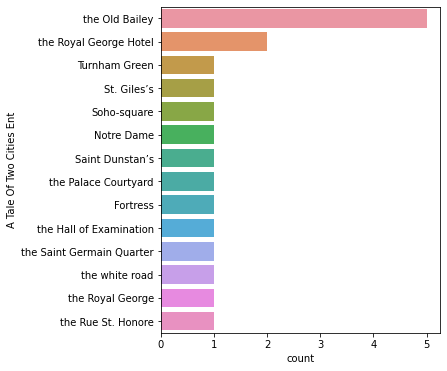

In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
nlp = spacy.load('en_core_web_lg')
#Load entities
doc1 = nlp(tale_two_cities_text)
tale_ent = []
#Get entities with lable "FAC"
for ent in doc1.ents:
    if ent.label_  in ["FAC"] :
        tale_ent.append(ent.text.strip())
    df_ent = pd.DataFrame(tale_ent, columns=["A Tale Of Two Cities Ent"])
#Plot
plt.figure(figsize=(5,6))
sns.countplot(y="A Tale Of Two Cities Ent",
             data=df_ent,
             order=df_ent["A Tale Of Two Cities Ent"].value_counts().iloc[:15].index)
plt.show() 

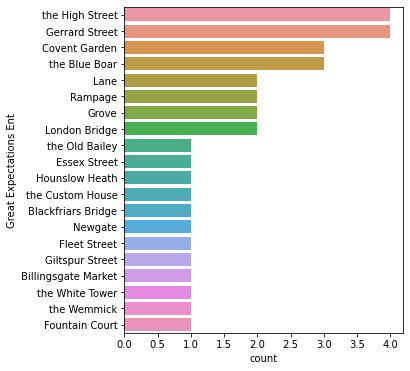

In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
nlp = spacy.load('en_core_web_lg')
#Load entities
doc1 = nlp(great_expectations_text)
great_ent = []
#Get entities with lable "FAC"
for ent in doc1.ents:
    if ent.label_  in ["FAC"] :
        great_ent.append(ent.text.strip())
    df_ent = pd.DataFrame(great_ent, columns=["Great Expectations Ent"])
#Plot
plt.figure(figsize=(5,6))
sns.countplot(y="Great Expectations Ent",
             data=df_ent,
             order=df_ent["Great Expectations Ent"].value_counts().iloc[:20].index)
plt.show() 

# Bonus:Map of Oliver Twist places
I created a map of the locations in which Oliver Twist took place.

In [ ]:
import pandas as pd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
places = pd.read_csv("Oliver Twist Places.csv", encoding='latin-1')

# Drop rows with missing locations
places.dropna(inplace=True)
m_2 = folium.Map(location=[51.5072,0.1276], tiles='cartodbpositron', zoom_start=8)

# Add location markers to the map
for idx, row in places.iterrows():
    Marker([row['Latitude'], row['Longitude']]).add_to(m_2)

# Display the map
m_2

# Conclusions
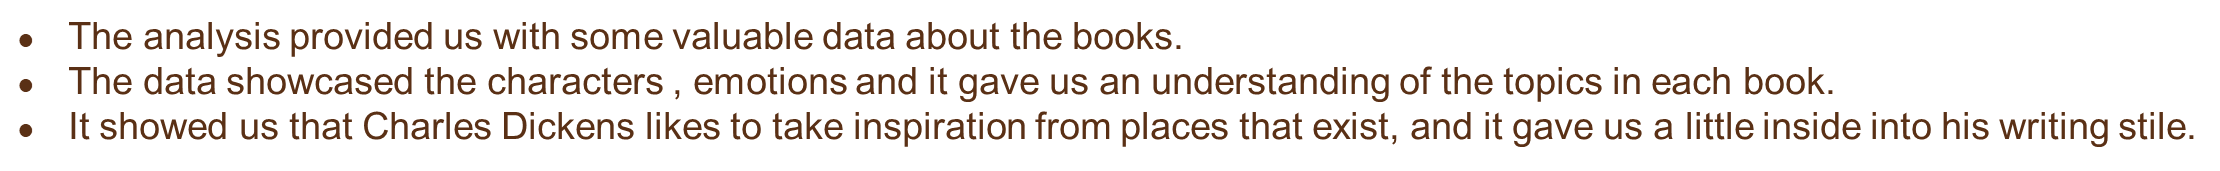